In [ ]:
#!pip install SpeechRecognition

# Speech Recognition

In [1]:
#import library
import speech_recognition as sr

In [2]:
# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

In [3]:
# Reading Audio file as source
# listening the audio file and store in audio_text variable

with sr.AudioFile('I dont know.wav') as source:
    audio_text = r.listen(source)
    # recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
    except:
        print('Sorry.. run again...')

Converting audio transcripts into text ...
I don't know who you are I don't know if you are looking for ransom I can tell you I don't know morning


In [4]:
#Adding french langauge option 


#text = r.recognize_google(audio_text, language = "fr-FR")
text = r.recognize_google(audio_text, language = "ta-IN")
print(text)

ஐ டோன்ட் யு


# SPAM DETECTION

In [5]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [6]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [7]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [8]:
del data["Unnamed: 2"]

In [9]:
del data["Unnamed: 3"]

In [10]:
del data["Unnamed: 4"]

In [11]:
print(data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
data.rename(columns = {'v1':'label', 'v2':'messages'}, inplace = True)

In [13]:
print(data.head())

  label                                           messages
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [14]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False).head(10)

,label,messages,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

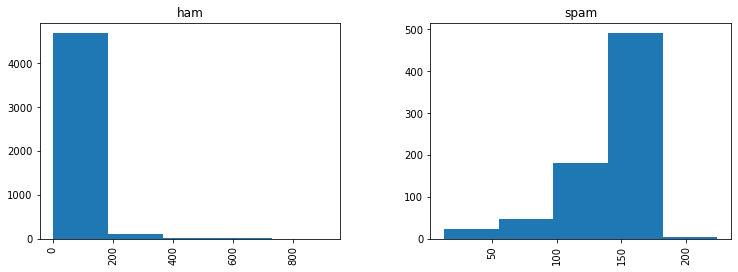

In [16]:
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [17]:
message = "Hi everyone!!! it is a pleasure to meet you."
message_not_punc = []
for punctuation in message:
    if punctuation not in string.punctuation:
           message_not_punc.append(punctuation)
# Join the characters again to form the string.
message_not_punc = ''.join(message_not_punc)
print(message_not_punc)

Hi everyone it is a pleasure to meet you


In [18]:
from nltk.corpus import stopwords

# Remove any stopwords for remove_punc, but first we should to transform this into the list.

message_clean = list(message_not_punc.split(" "))

# Remove any stopwords
i = 0

while i <= len(message_clean):
    for mess in message_clean:
        if mess.lower() in stopwords.words('english'):
            message_clean.remove(mess)
    i =i +1
    print(message_clean)


['Hi', 'everyone', 'is', 'pleasure', 'meet']
['Hi', 'everyone', 'pleasure', 'meet']
['Hi', 'everyone', 'pleasure', 'meet']
['Hi', 'everyone', 'pleasure', 'meet']
['Hi', 'everyone', 'pleasure', 'meet']


In [19]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [20]:
data['messages'].head(5).apply(transform_message)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorization = CountVectorizer(analyzer = transform_message )

X = vectorization.fit(data['messages'])

In [26]:
X_transform = X.transform([data['messages']])

print(X_transform)

KeyboardInterrupt: 

In [ ]:
tfidf_transformer = TfidfTransformer().fit(X_transform)

In [ ]:
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['messages'], test_size=0.30, random_state = 50)    

clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print('predicted', predictions)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))